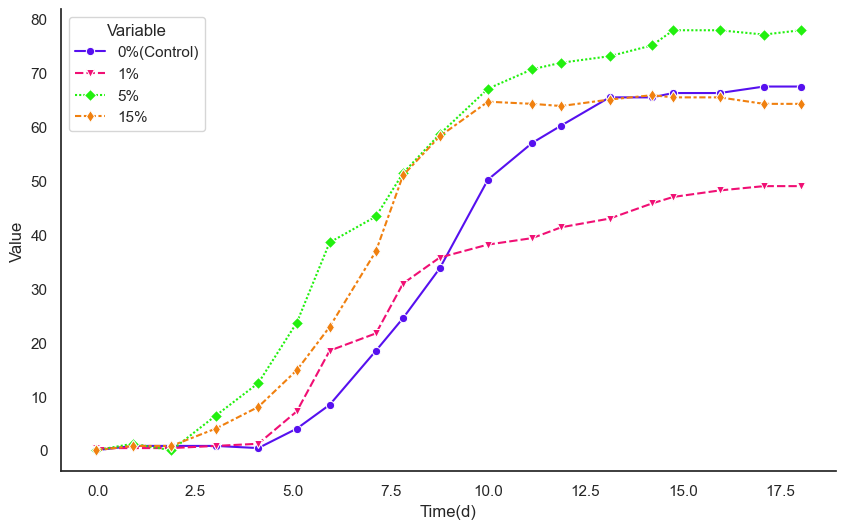

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv('MappingAnalysis_Data.csv')

sns.set(style='white')

plt.figure(figsize=(10, 6))
colors=["#5610ef","#f00f74","#22f00f","#f0800f"]
marker_styles={'0%(Control)':'o','1%':'v','5%':'D','15%':'d'}
data['marker'] = data['variable'].map(marker_styles)
#xz轴为Time列，Y轴为value列，变量为hue列
sns.lineplot(data=data, x='Time', y='value', hue='variable', style='variable',markers=list(marker_styles.values()), palette=colors)
plt.xlabel('Time(d)')
plt.ylabel('Value')

plt.legend(title='Variable', loc='best')

sns.despine()


output_path = 'class01_line.png'
plt.savefig(output_path, dpi=300)

plt.show()



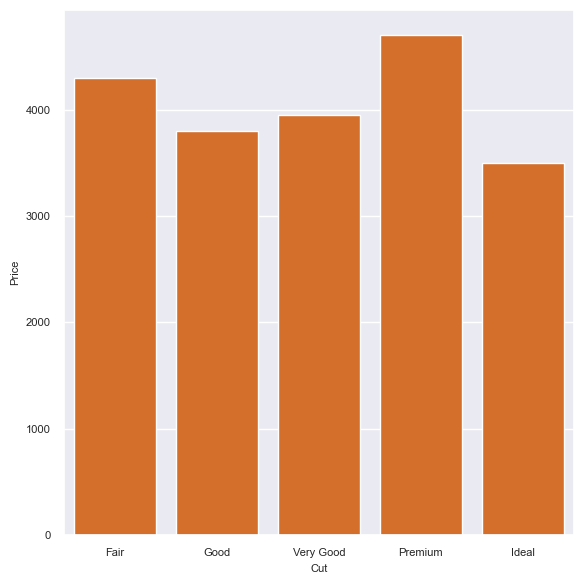

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv('singledata.csv')

sns.set(style='darkgrid')

plt.figure(figsize=(6, 6))
barplot = sns.barplot(x='Cut', y='Price',  data=data, color="#f0690f",dodge=False, legend=False,width=0.8)


plt.xlabel('Cut', fontsize=8)
plt.ylabel('Price', fontsize=8)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.tight_layout()

output_path = 'class01_bar.png'
plt.savefig(output_path)

plt.show()

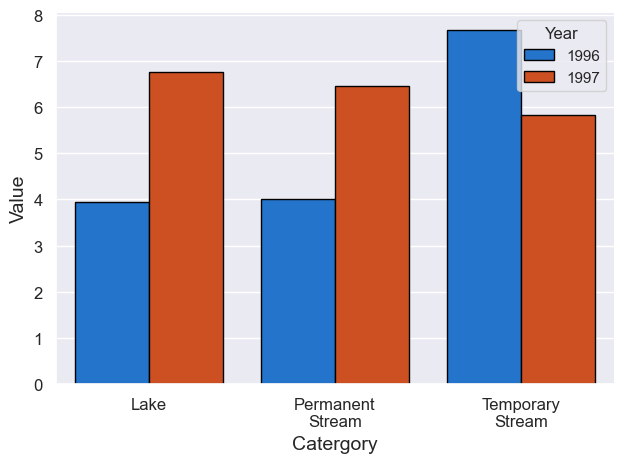

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('MultiColumn_Data.csv')

multidatalong = pd.melt(data, id_vars='Catergory', var_name='Year', value_name='Value')

# 对第一个数据系列（1996年）的数值进行升序排列
sorted_multidatalong_asc = multidatalong[multidatalong['Year'] == '1996'].sort_values(by='Value', ascending=True)

# 合并排序后的1996年和原始的1997年数据
sorted_data_asc = pd.concat([sorted_multidatalong_asc, multidatalong[multidatalong['Year'] == '1997']])
colors=["#0773e6","#e94307"]
sns.set(style="darkgrid")
sns.barplot(x='Catergory', y='Value', hue='Year', data=sorted_data_asc, palette=colors, edgecolor='black')

plt.xlabel('Catergory', fontsize=14)
plt.ylabel('Value', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.despine()

plt.tight_layout()
output_path = 'class01_Multibar.png'
plt.savefig(output_path)

plt.show()


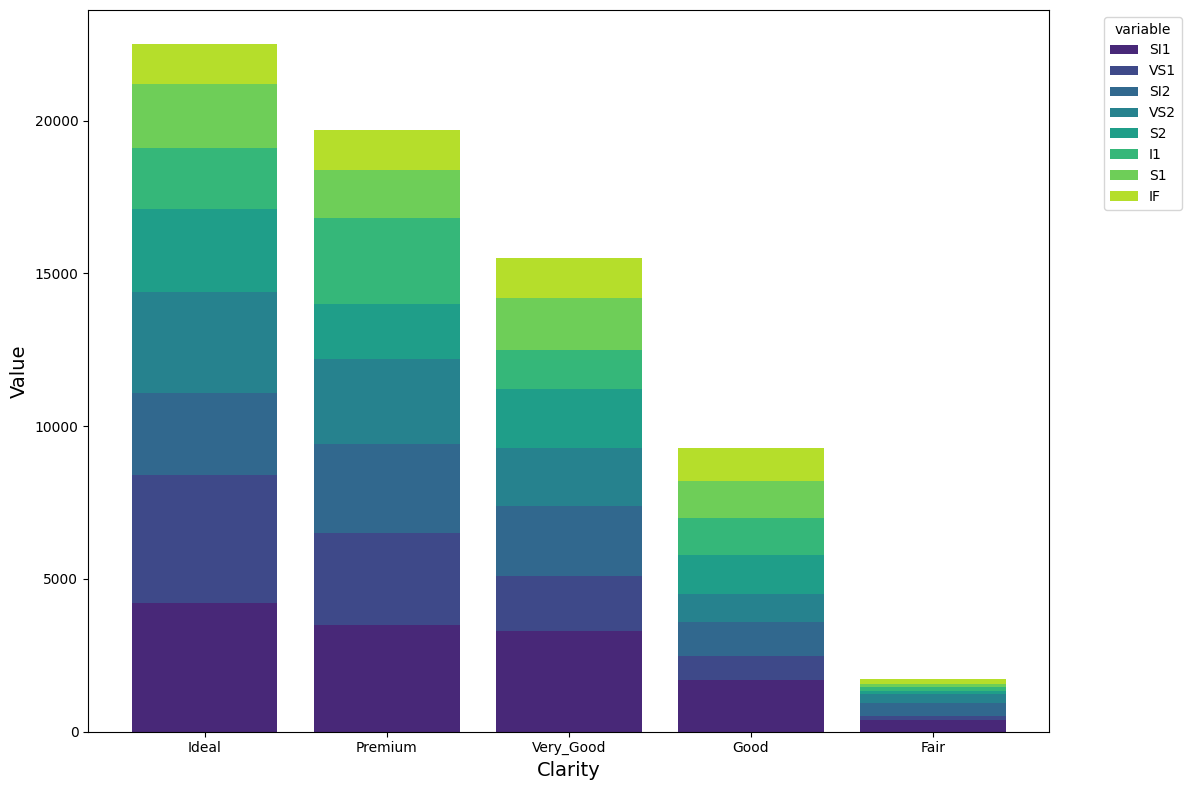

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取上传的CSV文件
file_path = 'StackedColumn_Data.csv'
stacked_data = pd.read_csv(file_path)

# 计算每个类别的总和并添加一列
stacked_data['Total'] = stacked_data.iloc[:, 1:].sum(axis=1)

# 按总和列排序数据
stacked_data_sorted = stacked_data.sort_values('Total', ascending=False).reset_index(drop=True)

# 转换为适合绘制堆积柱状图的长格式
stacked_data_long = pd.melt(stacked_data_sorted, id_vars=['Clarity', 'Total'], var_name='variable', value_name='Value')

# 根据图例变量的均值排序
category_means = stacked_data_long.groupby('variable')['Value'].mean().sort_values(ascending=False).index
stacked_data_long['variable'] = pd.Categorical(stacked_data_long['variable'], categories=category_means, ordered=True)

#创建颜色渐变
colors = sns.color_palette("viridis", len(category_means))

# 绘制堆积柱状图
plt.figure(figsize=(12, 8))
bottom = None
for i, category in enumerate(category_means):
    data = stacked_data_long[stacked_data_long['variable'] == category]
    if bottom is None:
        bottom = data['Value'].values
        plt.bar(data['Clarity'], data['Value'], label=category, color=colors[i])
    else:
        plt.bar(data['Clarity'], data['Value'], bottom=bottom, label=category, color=colors[i])
        bottom += data['Value'].values

# 添加标题和轴标签
plt.xlabel('Clarity', fontsize=14)
plt.ylabel('Value', fontsize=14)

# 图例按照均值排序
plt.legend(title='variable', bbox_to_anchor=(1.05, 1), loc='upper left')

# 调整图表布局
plt.tight_layout()

output_path = 'class01_StackedBar.png'
plt.savefig(output_path)
# 展示图形
plt.show()


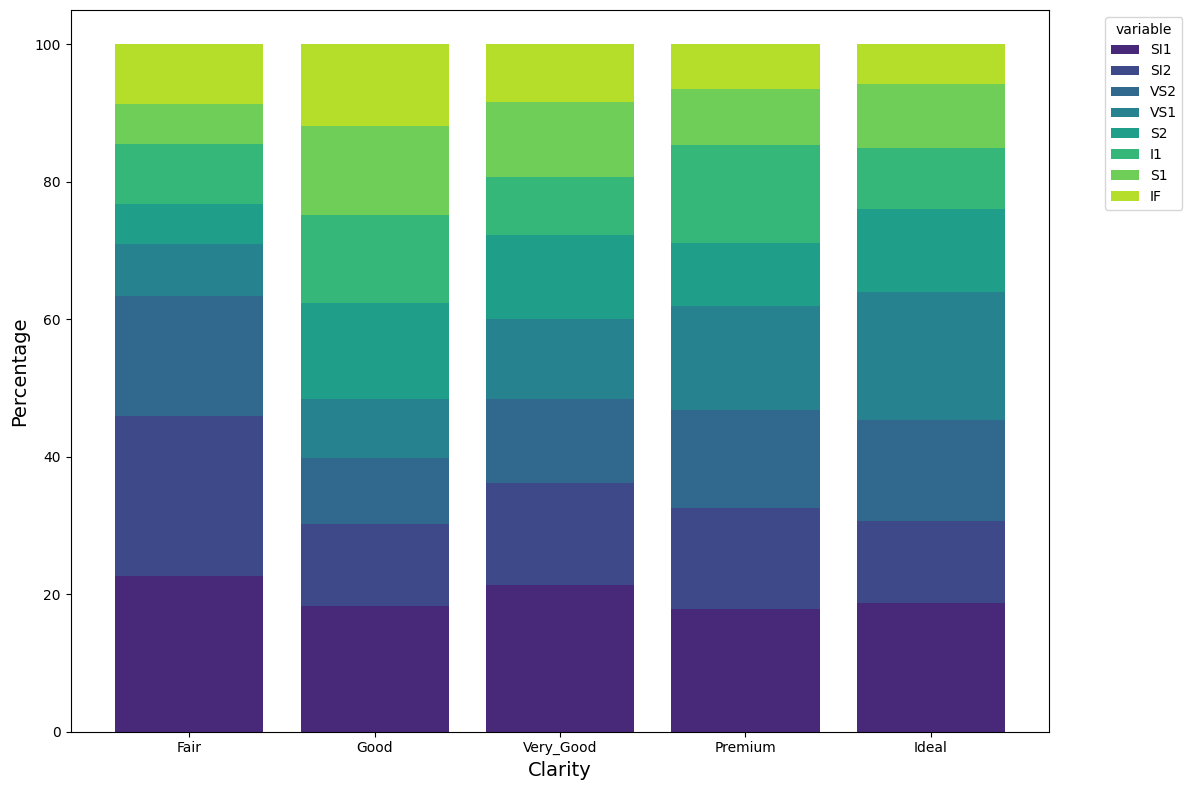

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取CSV文件
file_path = 'StackedColumn_Data.csv'
data = pd.read_csv(file_path)

# 计算每个类别的百分比
data_percentage = data.copy()
data_percentage.iloc[:, 1:] = data_percentage.iloc[:, 1:].div(data_percentage.iloc[:, 1:].sum(axis=1), axis=0).astype(float) * 100

# 转换为长格式，适合绘制堆积柱状图
data_long = pd.melt(data_percentage, id_vars='Clarity', var_name='variable', value_name='Percentage')

# 根据图例变量的均值进行排序，以确保堆积柱状图的顺序
category_means = data_long.groupby('variable')['Percentage'].mean().sort_values(ascending=False).index
data_long['variable'] = pd.Categorical(data_long['variable'], categories=category_means, ordered=True)

# 创建颜色渐变
colors = sns.color_palette("viridis", len(category_means))

# 绘制百分比堆积柱状图
plt.figure(figsize=(12, 8))
bottom = None
for i, category in enumerate(category_means):
    data_subset = data_long[data_long['variable'] == category]
    if bottom is None:
        bottom = data_subset['Percentage'].values
        plt.bar(data_subset['Clarity'], data_subset['Percentage'], label=category, color=colors[i])
    else:
        plt.bar(data_subset['Clarity'], data_subset['Percentage'], bottom=bottom, label=category, color=colors[i])
        bottom += data_subset['Percentage'].values
        
plt.xlabel('Clarity', fontsize=14)
plt.ylabel('Percentage', fontsize=14)

# 设置图例
plt.legend(title='variable', bbox_to_anchor=(1.05, 1), loc='upper left')

# 调整图表布局
plt.tight_layout()

# 显示图形
plt.show()
